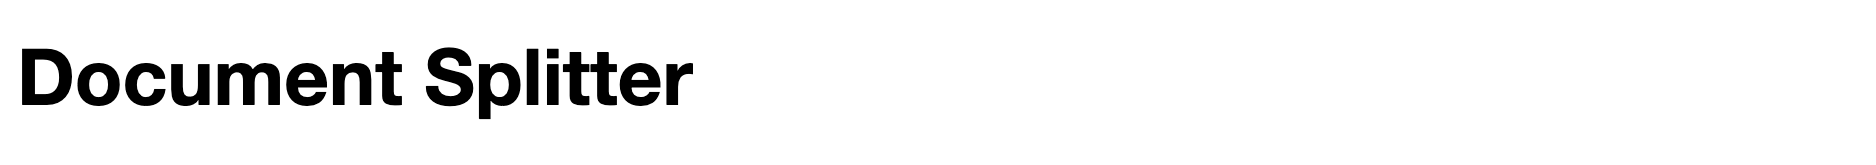

<img src='imgs/create_splitter_proc.png' width=2200/>

### 1. Download Multi-Page PDF

In [1]:
!gsutil cp gs://cloud-samples-data/documentai/multi-document.pdf ./pdf_samples/
MULTI_DOC = './pdf_samples/multi-document.pdf'



Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

Copying gs://cloud-samples-data/documentai/multi-document.pdf...
/ [1 files][729.5 KiB/729.5 KiB]                                                
Operation completed over 1 objects/729.5 KiB.                                    


In [2]:
from pdf2image import convert_from_path
import ipyplot

n_pages = !pdfinfo {MULTI_DOC}  | awk '/^Pages:/ {{print $$2}}'
n_pages = int(n_pages[0])

ipyplot.plot_images(convert_from_path(MULTI_DOC), img_width=500)

ModuleNotFoundError: No module named 'pdf2image'

### 2. Create Document Splitter
Lorem Ipsom blah blah....

<img src='imgs/proc_id.png' width=2200/>

### 3. Test All 3 Splitters

In [12]:
from google.cloud import documentai_v1beta3 as documentai  

PROJECT_ID = 'doc-ai-ce'

SPLITTERS = {
    'GDAI' : '32eac314a5d9baea',
    'LDAI': 'b194c9e614ab6c0c',
    'PDAI': 'a867c706191c84fc'
}

LOCATION = 'us'

### 4. Simple Splitter Function

In [13]:
def test_proc(PROCESSOR_ID, MULTI_DOC):

    # Document AI URI
    name = f"projects/{PROJECT_ID}/locations/{LOCATION}/processors/{PROCESSOR_ID}"
    
    with open(MULTI_DOC, "rb") as image:    
        # Request parameters with PDF file
        document = {"content": image.read(), "mime_type": "application/pdf"}
        request = {"name": name, "document": document}

    # call and return Document AI results
    return documentai.DocumentProcessorServiceClient().process_document(request=request)

### 5. View Varying Results

In [14]:
print('ACTUAL:',n_pages,'\n')

results_dict = {}
for PROCESSOR_ID in SPLITTERS.keys():
    print(PROCESSOR_ID + '-' + SPLITTERS[PROCESSOR_ID], end= ': ')
    results = test_proc(SPLITTERS[PROCESSOR_ID], MULTI_DOC)
    results_dict[PROCESSOR_ID] = results
    print(len(results.document.entities))
    print()

ACTUAL: 3 

GDAI-32eac314a5d9baea: 2

LDAI-b194c9e614ab6c0c: 2

PDAI-a867c706191c84fc: 3



# 9 Page PDF Attempt


ACTUAL: 9 

GDAI-32eac314a5d9baea: 2

LDAI-b194c9e614ab6c0c: 3

PDAI-a867c706191c84fc: 2




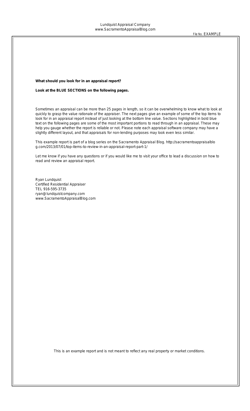
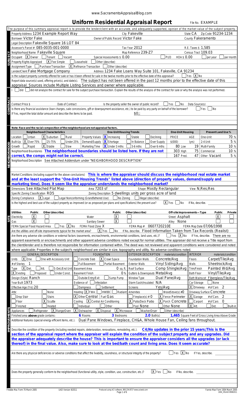
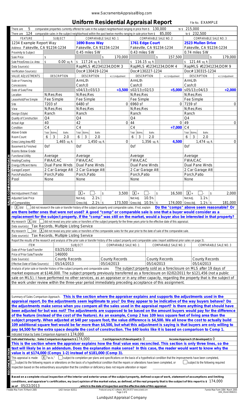
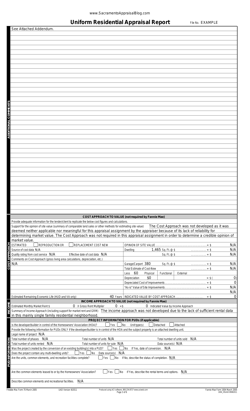
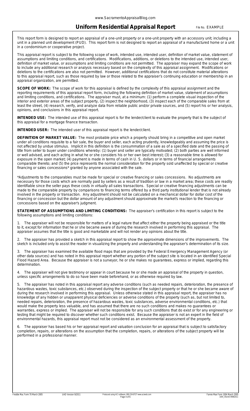
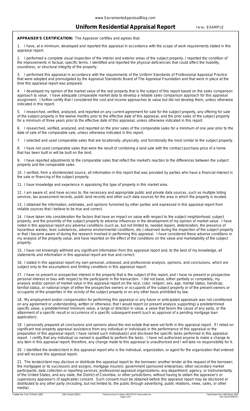
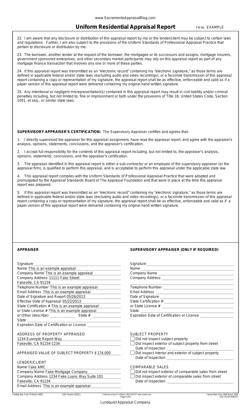
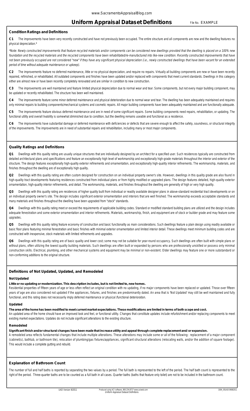
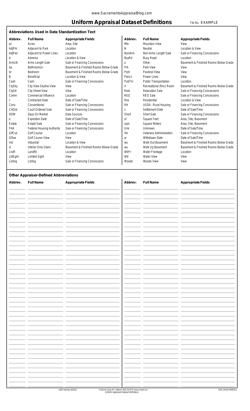


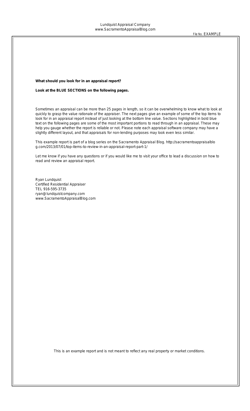
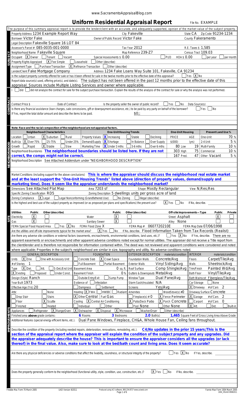
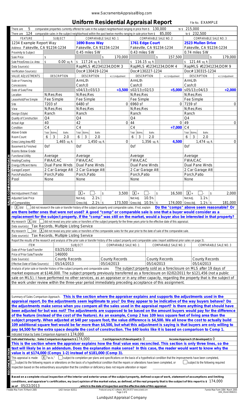
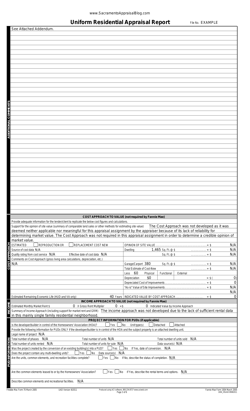
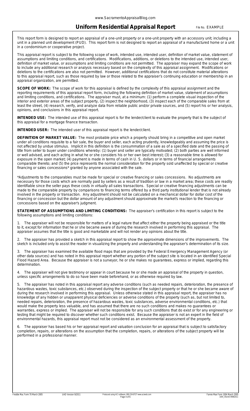
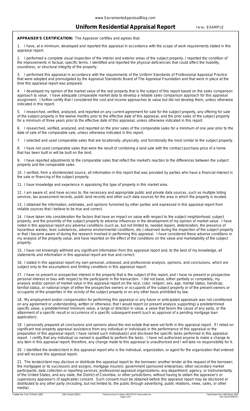
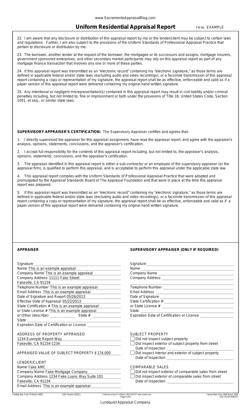
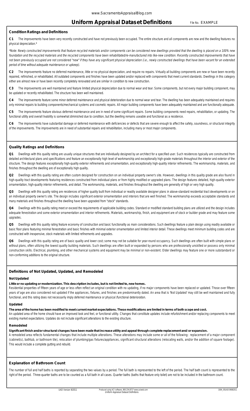
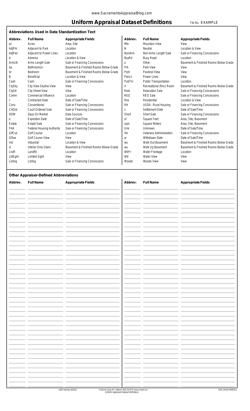

In [15]:
MULTI_DOC = 'pdf_samples/9-pages.pdf'

n_pages = !pdfinfo {MULTI_DOC}  | awk '/^Pages:/ {{print $$2}}'
n_pages = int(n_pages[0])

print('\nACTUAL:',n_pages,'\n')

SPLITTERS = {
    'GDAI' : '32eac314a5d9baea',
    'LDAI': 'b194c9e614ab6c0c',
    'PDAI': 'a867c706191c84fc'
}

def test_proc(PROCESSOR_ID, MULTI_DOC):

    # Document AI URI
    name = f"projects/{PROJECT_ID}/locations/{LOCATION}/processors/{PROCESSOR_ID}"
    
    with open(MULTI_DOC, "rb") as image:    
        # Request parameters with PDF file
        document = {"content": image.read(), "mime_type": "application/pdf"}
        request = {"name": name, "document": document}

    # call and return Document AI results
    return documentai.DocumentProcessorServiceClient().process_document(request=request)

results_dict = {}

for PROCESSOR_ID in SPLITTERS.keys():
    print(PROCESSOR_ID + '-' + SPLITTERS[PROCESSOR_ID], end= ': ')
    results = test_proc(SPLITTERS[PROCESSOR_ID], MULTI_DOC)
    results_dict[PROCESSOR_ID] = results
    print(len(results.document.entities))
    print()
    
ipyplot.plot_images(convert_from_path(MULTI_DOC), img_width=250, max_images=9)

### From <i>Doc Splitter Guide</i>
https://codelabs.developers.google.com/codelabs/docai-splitter-parser-v3-python#0

In [11]:
def print_pages_split(text: str, document: dict):
    """
    Document AI identifies possible page splits
    in document. This function converts page splits
    to text snippets and prints it.    
    """
    for i, entity in enumerate(document.entities):
        confidence = entity.confidence
        text_entity = ''
        for segment in entity.text_anchor.text_segments:
            start = segment.start_index
            end = segment.end_index
            text_entity += text[start:end]
        pages = [p.page for p in entity.page_anchor.page_refs]
        print(f"*** Entity number: {i}, Split Confidence: {confidence} ***")
        print(f"*** Pages numbers: {[p for p in pages]} ***\nText snippet: {text_entity[:100]}")
        print()
        
print_pages_split(results.document.text, results.document)

*** Entity number: 0, Split Confidence: 0.9813681244850159 ***
*** Pages numbers: [0] ***
Text snippet: Lundquist Appraisal Company
www.SacramentoAppraisalBlog.com
File No. EXAMPLE
What should you look fo

*** Entity number: 1, Split Confidence: 0.8641126155853271 ***
*** Pages numbers: [1, 2, 3, 4, 5, 6, 7, 8] ***
Text snippet: SUBJECT
www.SacramentoAppraisalBlog.com
Uniform Residential Appraisal Report
File No. EXAMPLE
The pu

